In [9]:
import numpy as np
import matplotlib.pyplot as plt
import decimal

from scipy import misc
from random import random

# Rosenbrock's Valley function:
def f(x, y):
    return (1 - x) ** 2 - (100 * (y - (x ** 2) ** 2))

# Global minimum at f(1, 1) = 0
f(1, 1)

0

## Partial Derivatives

In [10]:
def partial_x(x, y):
    return 2 * (200*x**3 - 200*x*y + x -1)

def partial_y(x, y):
    return 200 * (y - x ** 2)

In [11]:
# starting point is initialized between interval (0, 1) for x, y
x = random()
y = random()

## Gradient Descent

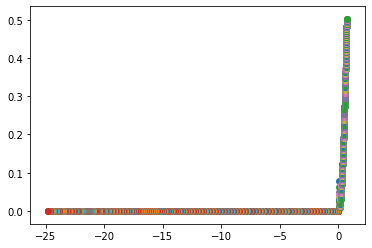

In [12]:
# learning rate
alpha = 0.001
# stop condition (difference near 0)
stop_cond = 0.0001

z = f(x, y)

plt.scatter(x, y)
# plt.scatter(z, 0)

num_iter = 0
z_diff = stop_cond + 10.0 # Greater condition than stop condition
z_prev = z

while z_diff > stop_cond or z > abs(stop_cond):
    # partial derivatives  
    x = x - (alpha * partial_x(x, y))
    y = y - (alpha * partial_y(x, y))
    
    # Re-calculate the function
    z = f(x , y)
    z_diff = abs(z_prev - z)
    z_prev = z
    
    plt.scatter(x, y)
#     plt.scatter(z, 0)
    
    num_iter += 1

In [13]:
# Final plotting and answers

print("Iterations needed: ", num_iter)
print("x: ", x)
print("y: ", y)

z = f(x, y)
print("z: ", z)

plt.show()

Iterations needed:  1026
x:  0.7088497492828352
y:  0.5011996542359214
z:  -24.78779116312554


# Newton's method

Defining **Hessian** matrix 

In [51]:
import numpy as np

def partial_x(x, y):
    return 2 * (200*x**3 - 200*x*y + x - 1)

def partial_y(x, y):
    return 200 * (y - x ** 2)

# partial_xy represents d/dy(d/dx(f(x, y)))

def partial_xx(x, y):
    return 1200*(x ** 2) - (400 * y) + 2

def partial_xy(x, y):
    return -400 * x

def partial_yx(x, y):
    return -400 * x

def partial_yy(x, y):
    return 200

In [52]:
# starting point is initialized between interval (0, 1) for x, y
x = random()
y = random()

# Hessian matrix
def hessian_matrix_inv(x, y):
    H = np.array([[partial_xx(x, y), partial_xy(x, y)], [partial_yx(x, y), partial_yy(x, y)]])
    return np.linalg.inv(H)

# Clears previous diagram
plt.clf()
H_inverse = hessian_matrix_inv(x, y)

# Gradient vector
g = np.array([partial_x(x, y), partial_y(x, y)])

<Figure size 432x288 with 0 Axes>

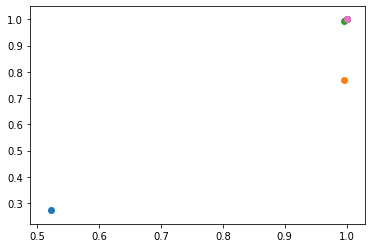

In [53]:
cost_diff = -H_inverse.dot(g)

threshold = 0
num_iterations = 0

while abs(cost_diff[0]) > threshold or abs(cost_diff[1]) > threshold:
    x += cost_diff[0]
    y += cost_diff[1]
    
    H_inverse = hessian_matrix_inv(x, y)
    g = np.array([partial_x(x, y), partial_y(x, y)])
    
    cost_diff = -H_inverse.dot(g)

    num_iterations += 1 
    plt.scatter(x, y)
        

In [48]:
print("Iterations needed for Newton's method: ", num_iterations)
print("x = {0}; y = {1}; f(x, y) = {2}".format(x, y, f(x, y)))

Iterations needed for Newton's method:  7
x = 1.0; y = 1.0; f(x, y) = 0.0
